<a href="https://colab.research.google.com/github/Gholamrezadar/Colab-notebooks/blob/main/Tamrin_4_DataMining_Gholamrezadar_96405037.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Gholamrezadar 5/23/2021
Random K-Means clustring vs K-Means++

using Silhouette and Knee method

### Loading dataset
and creating numpy arrays

In [123]:
!pip install kneed

In [124]:
import matplotlib.pyplot as plt
from kneed import KneeLocator
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.preprocessing import StandardScaler
import numpy as np
import pandas as pd

In [125]:
# loading data
df = pd.DataFrame(pd.read_csv("fish.csv"))

# seperating features and labels
features  = df.drop(['species'], axis = 1) 
labels  = df['species'] 

In [126]:
features.head()

,weight,length1,length2,length3,height,width
0,242.0,23.2,25.4,30.0,38.4,13.4
1,290.0,24.0,26.3,31.2,40.0,13.8
2,340.0,23.9,26.5,31.1,39.8,15.1
3,363.0,26.3,29.0,33.5,38.0,13.3
4,430.0,26.5,29.0,34.0,36.6,15.1


In [127]:
labels.head()

0    Bream
1    Bream
2    Bream
3    Bream
4    Bream
Name: species, dtype: object

In [128]:
# convert dataframe to numpy array
features_array = features.values
labels_array = labels.values

In [129]:
# debug numpy arrays
print(features_array[:5])
print()
print(labels_array[:5])

[[242.   23.2  25.4  30.   38.4  13.4]
 [290.   24.   26.3  31.2  40.   13.8]
 [340.   23.9  26.5  31.1  39.8  15.1]
 [363.   26.3  29.   33.5  38.   13.3]
 [430.   26.5  29.   34.   36.6  15.1]]

['Bream' 'Bream' 'Bream' 'Bream' 'Bream']


In [130]:
# standardizations
scaler = StandardScaler()
scaled_features = scaler.fit_transform(features_array)
print(scaled_features[:5])

[[-0.50109735 -0.36878558 -0.34323399 -0.23781518  1.0032125   0.25373964]
 [-0.37434344 -0.29750241 -0.26893461 -0.14634781  1.15869615  0.44376493]
 [-0.24230812 -0.30641281 -0.25242364 -0.15397009  1.13926069  1.0613471 ]
 [-0.18157187 -0.09256329 -0.04603648  0.02896467  0.96434159  0.20623332]
 [-0.00464454 -0.0747425  -0.04603648  0.06707608  0.8282934   1.0613471 ]]


## Q1)

### KMEANS

In [131]:
# Kmeans Clustering once
kmeans = KMeans(
    init="random",
    n_clusters=4,
    n_init=10,
    max_iter=300,
    random_state=1
)
kmeans.fit(scaled_features)

KMeans(algorithm='auto', copy_x=True, init='random', max_iter=300, n_clusters=4,
       n_init=10, n_jobs=None, precompute_distances='auto', random_state=1,
       tol=0.0001, verbose=0)

In [132]:
# calculating Average K-Means Score with k=8

# doing everything 10 times and calculating average silhouette_score
kmeans_avg_score = 0
num_tries = 10
for i in range(num_tries):
  # Kmeans Clustering
  kmeans = KMeans(
      init="random",
      n_clusters=8,
      n_init=1,
      max_iter=300,
      random_state=i
  )

  kmeans.fit(scaled_features)

  kmeans_avg_score += silhouette_score(
      scaled_features, kmeans.labels_
  )

kmeans_avg_score /= num_tries
kmeans_avg_score = kmeans_avg_score.round(4)
print("K-Means average score", kmeans_avg_score)

K-Means average score 0.4457



### KMEANS++



In [133]:
# calculating Average K-Means++ Score with k=8

# doing everything 10 times and calculating average silhouette_score
kmeanspp_avg_score = 0
num_tries = 10
for i in range(num_tries):
  # Kmeans Clustering
  kmeanspp = KMeans(
      init="k-means++",
      n_clusters=8,
      n_init=1,
      max_iter=300,
      random_state=i
  )
  
  kmeanspp.fit(scaled_features)

  kmeanspp_avg_score += silhouette_score(
      scaled_features, kmeanspp.labels_
  )

kmeanspp_avg_score /= num_tries
kmeanspp_avg_score = kmeanspp_avg_score.round(4)
print("K-Means++ average score", kmeanspp_avg_score)

K-Means++ average score 0.4716


### Comparison

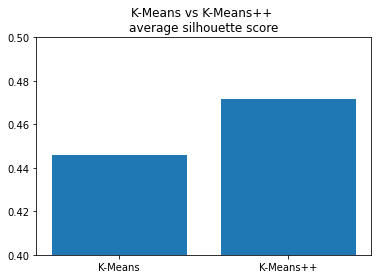

In [134]:
ax = plt.subplot()
ax.set_ylim([.4, 0.5])
ax.bar(["K-Means","K-Means++"],[kmeans_avg_score,kmeanspp_avg_score])
ax.set_title("K-Means vs K-Means++ \naverage silhouette score")
plt.show()

## Q2)

### Knee Method
Using Knee method to find the best cluster count

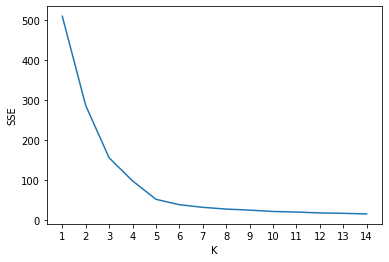

In [135]:
# keep track of error for each 'k'
errors = []
# find best 'k' between 1-15
for k in range(1, 15):
  kmeans = KMeans(
      init="random",
      n_clusters=k,
      n_init=10,
      max_iter=300,
      random_state=1)
  kmeans.fit(scaled_features)
  errors.append(kmeans.inertia_)

plt.plot(range(1, 15), errors)
plt.xticks(range(1, 15))
plt.xlabel("K")
plt.ylabel("SSE")
plt.show()

In [136]:
#finding best K
kl = KneeLocator(
    range(1, 15), errors, curve="convex", direction="decreasing"
)

print("Best K :",kl.elbow)

Best K : 5
